In [1]:
##Importing the packages##

import urllib.request #To scrape data from the web
from bs4 import BeautifulSoup #To parse data from the web
import spacy #NLP library 
import string 
from string import punctuation #Pre-defined string with punctuation
import nltk
from nltk.probability import FreqDist #To calculate frequencies 
import matplotlib.pyplot as plt #To plot the final graphs
import numpy as np #to manipulate arrays 

In [2]:
## Reading data from the web##
url_1_eng= 'https://www.nature.com/articles/d41586-024-00260-z'
url_2_esp= 'https://elpais.com/ciencia/2024-01-25/las-primeras-imagenes-desde-la-luna-de-la-nave-japonesa-revelan-que-cayo-de-lado.html'

def reading_text(url_with_text): 
    response = urllib.request.urlopen(url_with_text) #access url
    html = response.read() #reads url content
    soup = BeautifulSoup(html, 'html.parser') #Parses HTML
    paragraphs = soup.find_all('p')  # Finds text contained within <p> tags
    text = '\n'.join([paragraph.get_text() for paragraph in paragraphs]) # Extract text from paragraphs
    return text


text_eng= reading_text(url_1_eng) #To retrieve article in English
text_es= reading_text(url_2_esp) #To retrieve article in Spanish


In [3]:
##Use this fuction if you need to retrieve an specific portion of text from scraped output.##

raw_text= text_eng.split("\n") #full scraped output, splitted by line breaks "\n"

#We copied the first and last line of text of the section we want to use

first_line= "After being stuck without power for more than a week, Japan’s Moon lander has woken up and started snapping images of the lunar surface."
last_line= "For now, the SLIM team will continue analysing data gathered from the probe’s landing. “We believe that the success of the pinpoint Moon landing will be utilized in future lunar-exploration missions,” says JAXA’s spokesperson."

#Find indexes of first and last line of the article 
for i in range(len(raw_text)):
   if raw_text[i] == first_line or raw_text[i] == last_line: #if i equals "first_line" or "last_line" prints index
      print("Index line:", i) 

text_eng= ' '.join(raw_text[10:20]) #Use slicing with the positions obtained and join the text to obtain the text we want to work with 

Index line: 10
Index line: 20


In [4]:
#Example of the scraped text in English 
print(text_eng)

After being stuck without power for more than a week, Japan’s Moon lander has woken up and started snapping images of the lunar surface. On 28 January, the Japan Aerospace Exploration Agency (JAXA) re-established contact with the Smart Lander for Investigating Moon (SLIM), which touched down on the slope of a crater near the Moon’s equator on 20 January. “Communication with SLIM was successfully established last night, and operations resumed,” JAXA announced in a post on X (formerly Twitter). SLIM landed on the Moon’s surface roughly 55 metres away from its original target, making it the most precise landing ever accomplished. Days later, NASA’s Lunar Reconnaissance Orbiter spotted the lander on the Moon from 80 kilometres above. But the landing wasn’t entirely smooth sailing, with one of the probe’s two engines probably losing thrust at just 50 metres above the surface, Jonathan McDowell, an astrophysicist at the Harvard–Smithsonian Center for Astrophysics in Cambridge, Massachusetts,

In [5]:
## Tokenizing ##

def tokenizer(article, language):
    nlp= spacy.blank(language) #Opens spacy object 
    doc=nlp(article) #Process text with spacy 
    tokens= [] #for storing tokens
    for token in doc:
        x= token.text #gets text from token
        tokens.append(x)
     
    return tokens


tokens_en= tokenizer(text_eng, "en")
tokens_es= tokenizer(text_es, "es")

In [6]:
## Normalizing text ##

def normalizing(text_tokens):
    punctuation= string.punctuation #list with punctuation
    lower_text= [w.lower() for w in text_tokens] #transfors text in lower case characters
    no_punct= [w for w in lower_text if w not in punctuation] #removes punctuation
    return no_punct

clean_en_text= normalizing(tokens_en)
clean_es_text= normalizing(tokens_es)

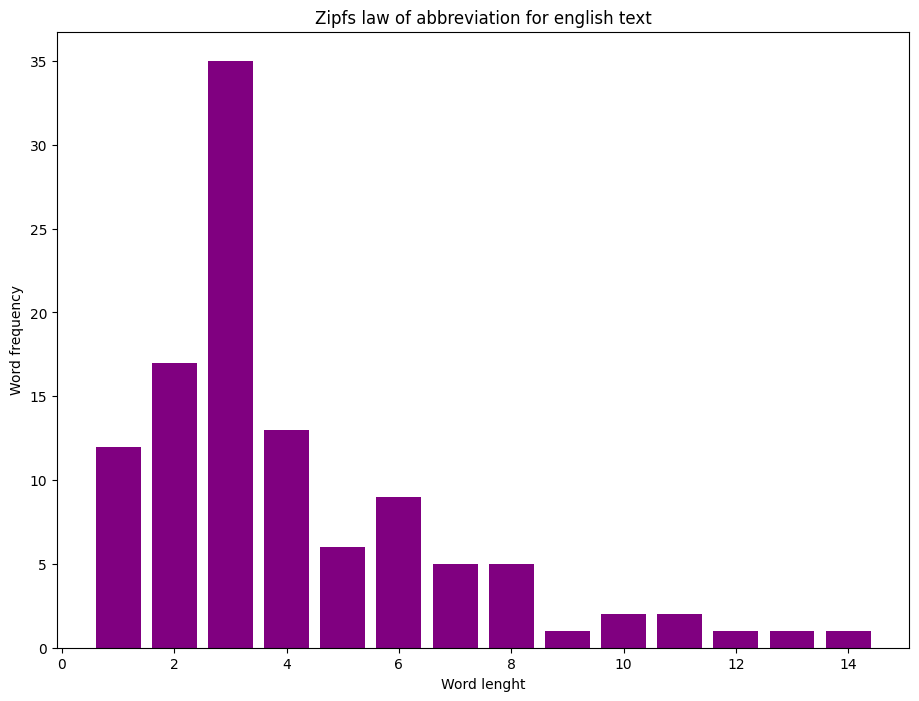

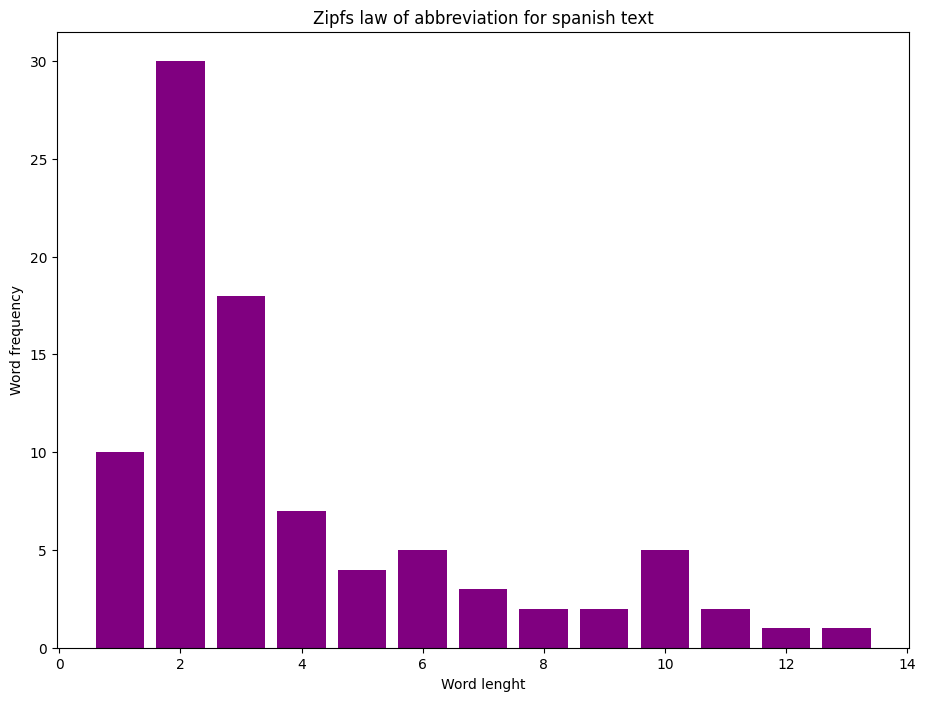

In [7]:
## Counting frequency ##

frequency_en= FreqDist(clean_en_text) #Calculates frequency of appearance for each word
frequency_es= FreqDist(clean_es_text)

#Plots frequency

def plotting_freq(freq_list, name_text_plot):
    word_lengths = [len(word) for word in freq_list.keys()] #counts lenght of each word from the frequency distribution
    frequencies = list(freq_list.values()) #Takes frequencies from FreqDist
    
    # Plotting the scatter plot
    fig, ax = plt.subplots(figsize=(11, 8)) 
    ax.bar(word_lengths, frequencies, color='purple')
    #labels
    ax.set_title(f'Zipfs law of abbreviation for {name_text_plot}')
    ax.set_xlabel('Word lenght')
    ax.set_ylabel('Word frequency')

    plt.show()

plotting_freq(frequency_en, "english text")
plotting_freq(frequency_es, "spanish text")


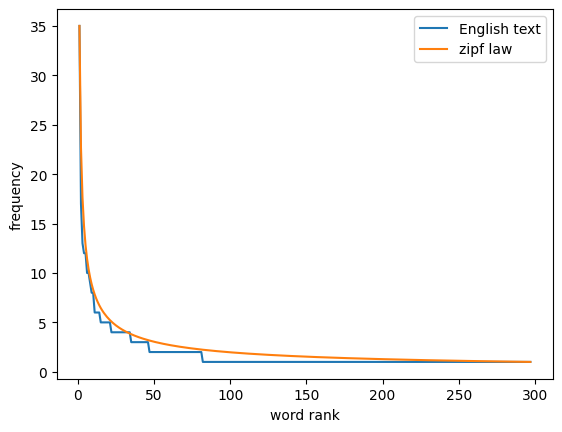

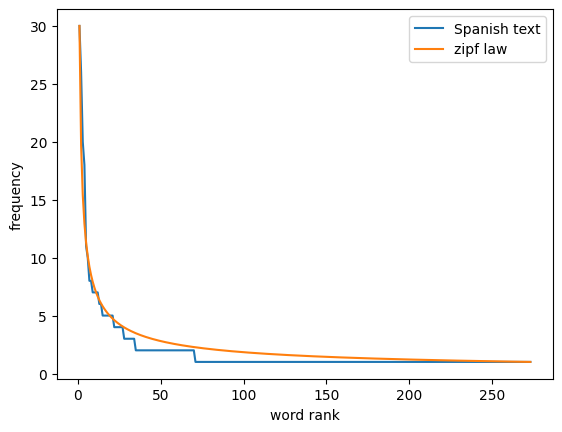

In [8]:
##Zipft's law##

def zipfs_law(freq_dist, name_text_plot):
    sorted_dict = dict(sorted(freq_dist.items(), key=lambda item: item[1], reverse=True)) #sorted dictionary to obtain frequencies in decreasing order
    freq_list = []
    for word, frequency in list(sorted_dict.items()): 
      freq_list.append(frequency) 
    freq_list = np.asarray(freq_list) 
    n = np.arange(freq_list.shape[0])+1 
    y = freq_list[0]/(np.power(n, np.log(freq_list[0])/np.log(freq_list.shape[0]))) #Calculation of Zipf's law: 1/(words rank)^a, where a=np.log(freq_list[0])/np.log(freq_list.shape[0]))
    plt.plot(n, freq_list, label=name_text_plot)
    plt.plot(n, y, label='zipf law')
    plt.legend()
    plt.xlabel('word rank')
    plt.ylabel('frequency')
    plt.show()


zipfs_law(frequency_en, "English text")
zipfs_law(frequency_es, "Spanish text")